In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('hcc_dataset.csv')

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

### Class Distribution
We look at the distribution of the target classes.


Class
Lives    102
Dies      63
Name: count, dtype: int64


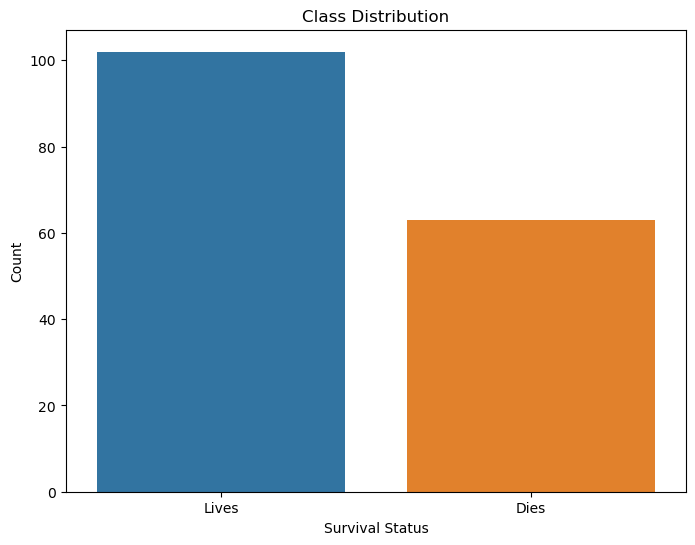

In [4]:
# Class distribution
class_distribution = data['Class'].value_counts()
print(class_distribution)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()


### Removing Outliers
We remove outliers using the IQR method.


In [5]:
# List of columns to remove outliers from
columns = ['Age']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from specified columns
data_no_outliers = remove_outliers_iqr(data, columns)

# Display the shape of the new DataFrame
print("Original data shape:", data.shape)
print("Data shape after removing outliers:", data_no_outliers.shape)


Original data shape: (165, 50)
Data shape after removing outliers: (161, 50)


## Data Preprocessing
After removing outliers, we preprocess the data for modeling.


In [6]:
# Verify data after removing outliers
print(data_no_outliers.info())
print(data_no_outliers.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          161 non-null    object
 1   Symptoms        161 non-null    object
 2   Alcohol         161 non-null    object
 3   HBsAg           161 non-null    object
 4   HBeAg           161 non-null    object
 5   HBcAb           161 non-null    object
 6   HCVAb           161 non-null    object
 7   Cirrhosis       161 non-null    object
 8   Endemic         161 non-null    object
 9   Smoking         161 non-null    object
 10  Diabetes        161 non-null    object
 11  Obesity         161 non-null    object
 12  Hemochro        161 non-null    object
 13  AHT             161 non-null    object
 14  CRI             161 non-null    object
 15  HIV             161 non-null    object
 16  NASH            161 non-null    object
 17  Varices         161 non-null    object
 18  Spleno         

## Predictive Modeling
We build and evaluate a logistic regression model.


In [8]:
# Assuming 'Survival_Status' is the target column and 'Age' is one of the features
# Encode 'Survival_Status' to binary (0 = Dies, 1 = Lives)
data_no_outliers['Class'] = data_no_outliers['Class'].apply(lambda x: 1 if x == 'Lives' else 0)

# Feature and target variable
X = data_no_outliers[['Age']]  # Add more features if available
y = data_no_outliers['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[ 0 13]
 [ 1 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.59      0.95      0.73        20

    accuracy                           0.58        33
   macro avg       0.30      0.47      0.37        33
weighted avg       0.36      0.58      0.44        33


Accuracy Score:
0.5757575757575758


C:\Users\Soraia\AppData\Local\Temp\ipykernel_10652\1170677916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Class'] = data_no_outliers['Class'].apply(lambda x: 1 if x == 'Lives' else 0)


### Visualize the Results
We visualize the results to better understand the model's performance.


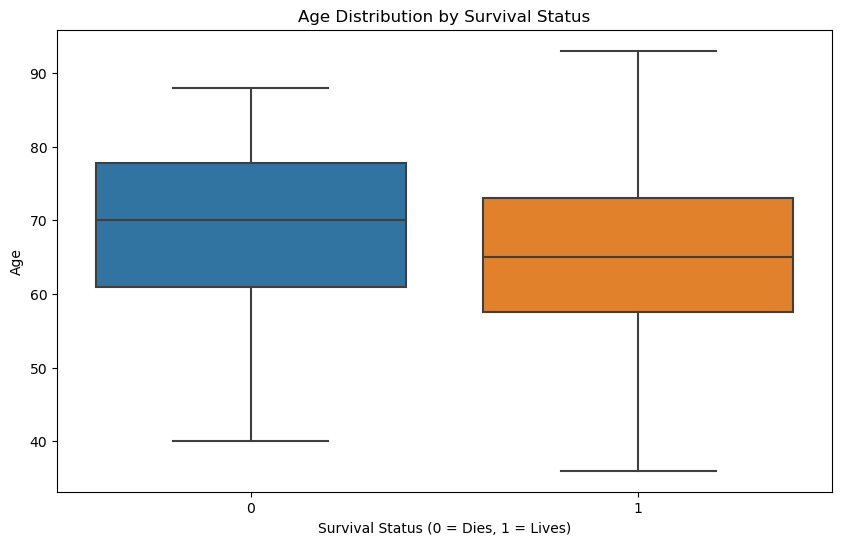

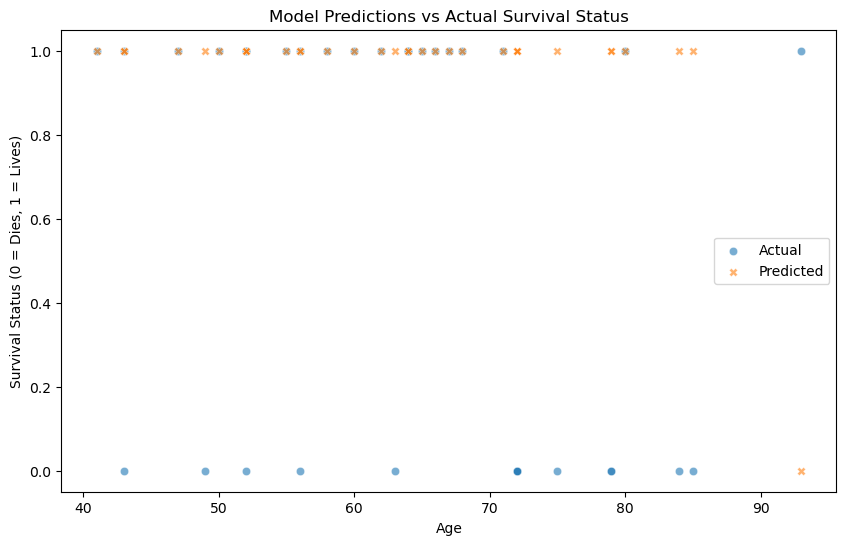

In [10]:
# Visualize the age distribution with respect to survival status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Age', data=data_no_outliers)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survival Status (0 = Dies, 1 = Lives)')
plt.ylabel('Age')
plt.show()

# Visualize the model predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Age'], y=y_test, label='Actual', alpha=0.6)
sns.scatterplot(x=X_test['Age'], y=y_pred, label='Predicted', alpha=0.6, marker='X')
plt.title('Model Predictions vs Actual Survival Status')
plt.xlabel('Age')
plt.ylabel('Survival Status (0 = Dies, 1 = Lives)')
plt.legend()
plt.show()
